## Data science and Buisiness Analytics Internship at The Sparks Foundation
### **Task 1: Prediction using Supervised Machine Learning**
### In this task we have to Predict the marks that a student is expected to score based upon the number of hours they studied
#### *- By Khan Shoeb*

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data from url

data_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(data_url) 
print('Data imported Successfully')

Data imported Successfully


In [3]:
# Printing Top ten Rows
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Printing Bottom ten Rows
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Shape of the data i.e. number of Rows and Columns
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Checking for any Null value 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualizing the data

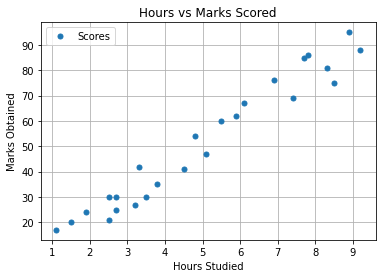

In [9]:
# Ploting the graph for finding any correlation
data.plot(x="Hours", y="Scores", style=".", markersize=10 )
plt.title("Hours vs Marks Scored")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.grid()
plt.show()

In [10]:
# From the graph we can clearly see that there is a positive Correlation between Score and Hours.
# we can also confirm it by using correlation funtion "corr()"
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data preparation

In [11]:
# The next step is to seperate the data into "attributes" (inputs) and "labels" (outputs).

x=data.iloc[:, :1].values
y=data.iloc[:, 1:].values

In [12]:

x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:

y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [14]:
# Now we have to split data for Training(80%) and Testing(20%)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Training the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Training is completed")

Training is completed


## Visualizing the model

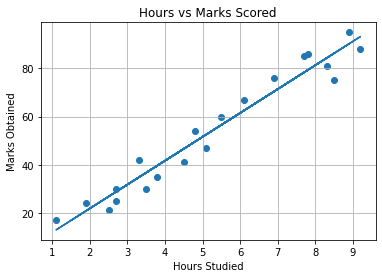

In [16]:
# Plotting Regression Line and Test data
R_line = model.coef_* x + model.intercept_ 

plt.scatter(X_train, Y_train,)
plt.plot(x, R_line,)
plt.title("Hours vs Marks Scored")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.grid()
plt.show()

## Testing Model 

In [17]:
# before testing lets see our testing data
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [18]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [19]:
# Now we test it.
Y_pred = model.predict(X_test)
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
# lets Compare the Actual vs Pridicted scores

compare =  pd.DataFrame({"Aactual": [Y_test], "Predicted": [Y_pred]})
compare

## Making Prediction with custom data

In [21]:
# Test with your own Data

hours = 9.25
pred = (model.predict([[hours]]) [0])
print("If a student studied {} hours".format(hours))
print("Then there score would be {}".format(pred))

If a student studied 9.25 hours
Then there score would be [93.69173249]


## Evaluating the Model

In [22]:
from sklearn import metrics
error = metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute error:{}".format(error))

Mean Absolute error:4.183859899002982


## Conclusion 
#### Using Linear Regression we made a predictive model which have 4.6213 M.A.E